## Consipracy Theories

In [1]:
import pandas as pd
import numpy as np
from cytoolz import *

from collections import defaultdict
import matplotlib.pyplot as plt

%matplotlib inline


In [39]:
from sklearn.feature_extraction.text import *
from sklearn.metrics.pairwise import *
from sklearn.neighbors import *
from sklearn.metrics import *
from sklearn.neighbors import NearestNeighbors

from scipy.cluster.hierarchy import *
from scipy.spatial.distance import *

#scipy clustering is good over scikit learn cluster

In [3]:
posts=pd.read_msgpack("http://bulba.sdsu.edu/reddit-ner.dat")

In [4]:
posts

(((u'Gary Null', u'PERSON'), (u'2hr', u'ORDINAL')),
 ((u'Third', u'ORDINAL'), (u'Suez - Israel', u'ORG'), (u'Sri Lanka', u'GPE')),
 ((u'Reddit', u'ORG'),),
 ((u'Skilluminati - The Rosetta Stone', u'ORG'),
  (u'M.O. - Concentrate', u'ORG'),
  (u'Quigley', u'ORG'),
  (u'Elite', u'GPE'),
  (u'Tragedy and Hope', u'WORK_OF_ART')),
 ((u'the White House', u'ORG'),),
 ((u'The Dark Side of Social Engineering', u'WORK_OF_ART'),
  (u'The Hidden Face of Terrorism', u'ORG')),
 ((u'America', u'GPE'),),
 ((u'Analysis and Simulation', u'ORG'),),
 ((u'9/11', u'CARDINAL'),),
 ((u'AT&T Invents Programming Language', u'ORG'),),
 ((u'9-11', u'CARDINAL'), (u'Estonia', u'GPE'), (u'Sinking', u'GPE')),
 ((u'Martin Luther King', u'PERSON'),),
 ((u'Fourth Amendment', u'ORG'), (u'No Application" After', u'WORK_OF_ART')),
 ((u'The Twisted Politics of Ray McGovern', u'WORK_OF_ART'),
  (u'George Bush Sr', u'PERSON'),
  (u'Mensch', u'PERSON')),
 ((u'History and Conspiracy', u'WORK_OF_ART'),),
 ((u'about 9/11 are cons

## Make term/term matrix 

In [8]:
def get_names(ents):
    return [n for n,t in ents if t in ['PERSON','ORG','GPE','FACILITY'] and n.strip()!='']
#geo political entity gpe, org -organization


In [9]:
V=CountVectorizer(analyzer=get_names,binary=True,min_df=5)
#analyser does the preprocessing, until now we were doing separately here we are doing it here
#getting rid of documents with less than 5 frequency , min_Df
dtm=V.fit_transform(posts)


In [10]:
dtm

<390034x53282 sparse matrix of type '<type 'numpy.int64'>'
	with 2761182 stored elements in Compressed Sparse Row format>

In [13]:
ttm=dtm.T.dot(dtm)

In [15]:
freq=ttm.diagonal()

In [16]:
ttm

<53282x53282 sparse matrix of type '<type 'numpy.int64'>'
	with 44884560 stored elements in Compressed Sparse Column format>

In [17]:
#take most top most common names
top=freq.argsort()[-250:]
ttm2=ttm[top]
ttm2

<250x53282 sparse matrix of type '<type 'numpy.int64'>'
	with 5358208 stored elements in Compressed Sparse Column format>

In [18]:
#for interpreting and visualiations

names=[V.get_feature_names()[i] for i in top]

## Clustering

In [24]:
# to see pattern and relation between top 250 names
D=pairwise_distances(ttm2,metric='cosine')
link=linkage(squareform(D),'ward')

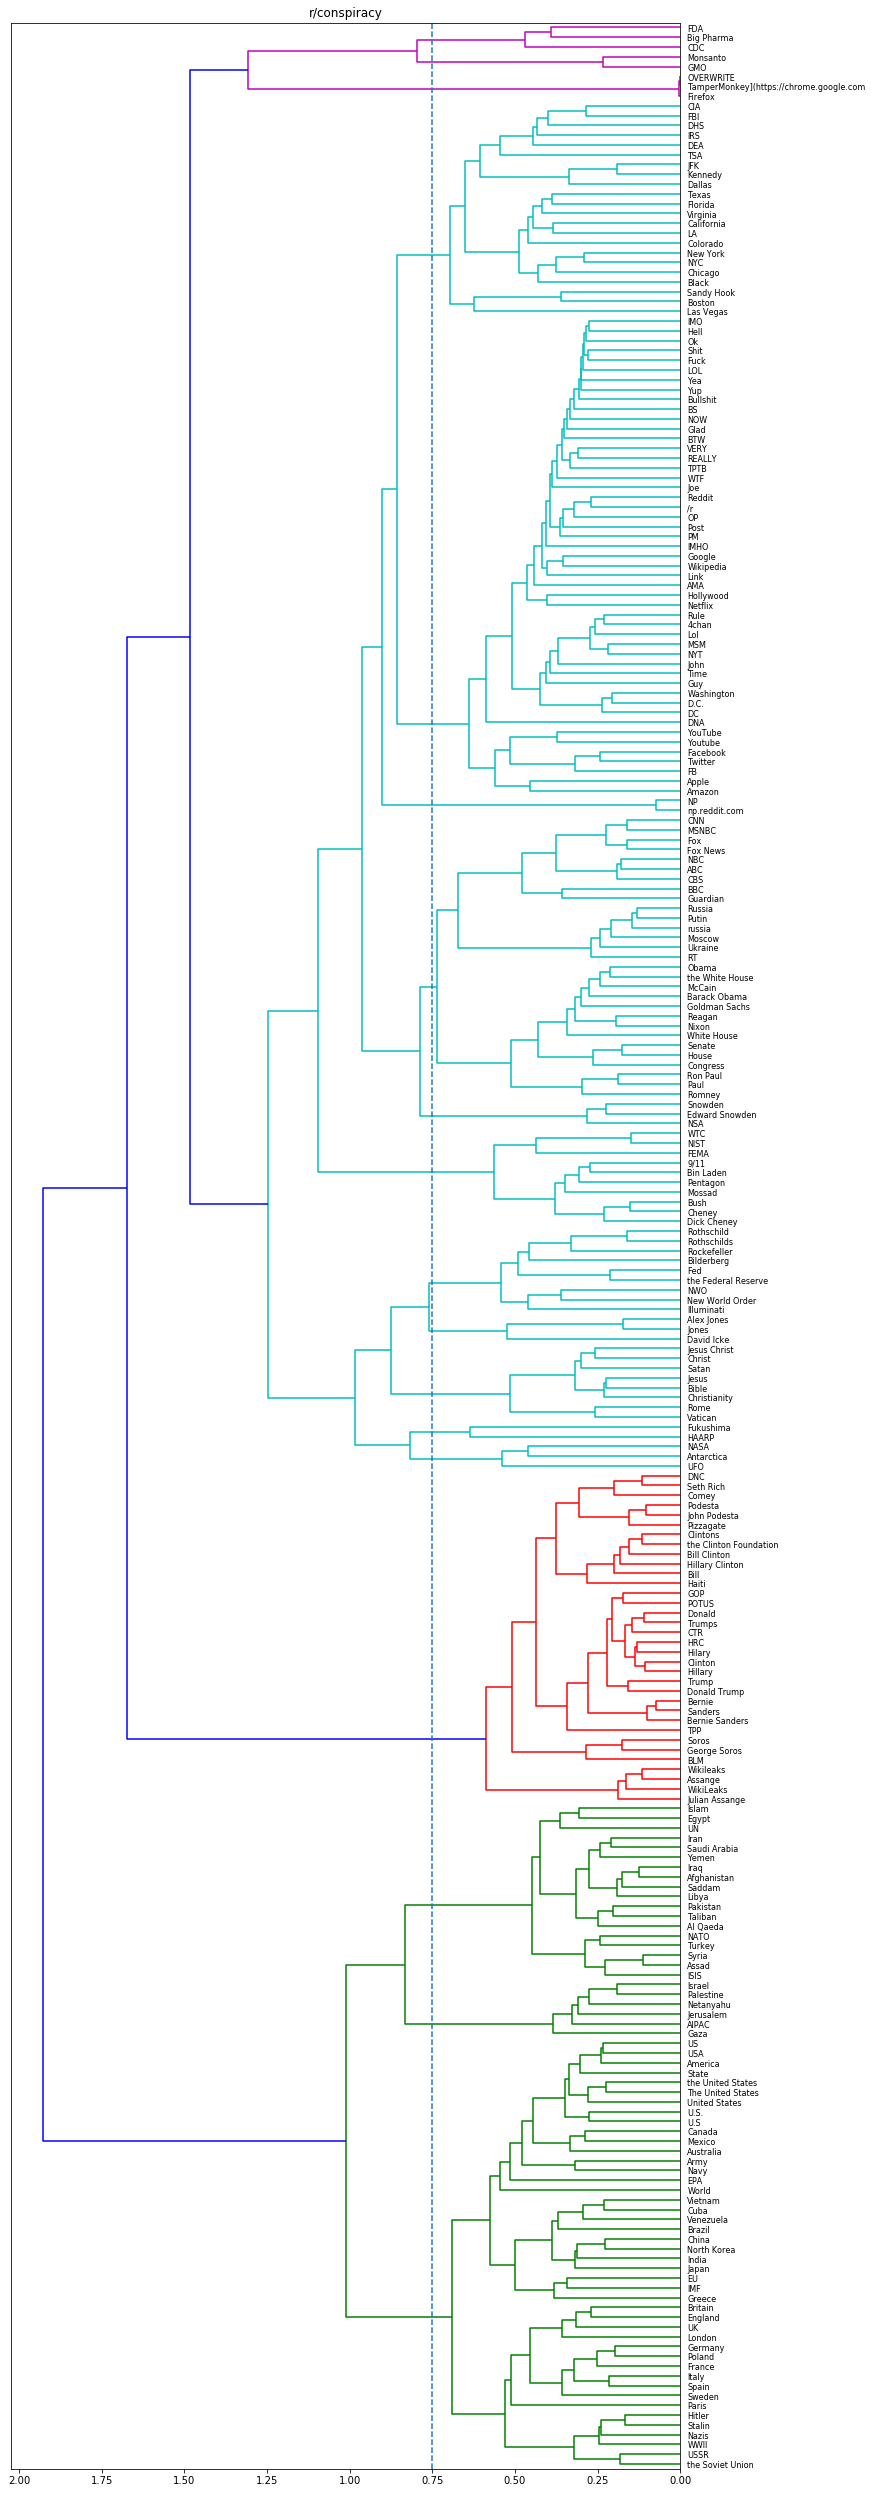

In [27]:
plt.rcParams['figure.figsize']='12,45'

dendrogram(link,labels=names,orientation='left',leaf_font_size=8)
plt.axvline(x=0.75,ls='--')
#based on eyeballing decided the 75% to draw the line
#anyhting below line is clusters , above the line is not cluters
plt.title('r/conspiracy')
plt.show()

In [28]:
clusters=defaultdict(set)
for c,n in zip(cut_tree(link,height=0.75),names):
    clusters[c[0]].add(n)
for n in clusters.values():
    print(','.join(sorted(n)))
    print()

Bilderberg,Fed,Illuminati,NWO,New World Order,Rockefeller,Rothschild,Rothschilds,the Federal Reserve
()
/r,4chan,AMA,Amazon,Apple,BS,BTW,Bullshit,D.C.,DC,DNA,FB,Facebook,Fuck,Glad,Google,Guy,Hell,Hollywood,IMHO,IMO,Joe,John,LOL,Link,Lol,MSM,NOW,NYT,Netflix,OP,Ok,PM,Post,REALLY,Reddit,Rule,Shit,TPTB,Time,Twitter,VERY,WTF,Washington,Wikipedia,Yea,YouTube,Youtube,Yup
()
Assange,BLM,Bernie,Bernie Sanders,Bill,Bill Clinton,CTR,Clinton,Clintons,Comey,DNC,Donald,Donald Trump,GOP,George Soros,HRC,Haiti,Hilary,Hillary,Hillary Clinton,John Podesta,Julian Assange,POTUS,Pizzagate,Podesta,Sanders,Seth Rich,Soros,TPP,Trump,Trumps,WikiLeaks,Wikileaks,the Clinton Foundation
()
Afghanistan,Al Qaeda,Assad,Egypt,ISIS,Iran,Iraq,Islam,Libya,NATO,Pakistan,Saddam,Saudi Arabia,Syria,Taliban,Turkey,UN,Yemen
()
America,Army,Australia,Brazil,Britain,Canada,China,Cuba,EPA,EU,England,France,Germany,Greece,Hitler,IMF,India,Italy,Japan,London,Mexico,Navy,Nazis,North Korea,Paris,Poland,Spain,Stalin,State,Sweden,The U

In [42]:
neighbors=NearestNeighbors(metric='cosine',algorithm='brute').fit(ttm)

In [43]:
def get_neighbors(name, k=10):
    _,terms =neighbors.kneighbors(ttm[V.vocabulary_[name]],n_neighbors=k)
    return [V.get_feature_names()[t] for t in terms[0]]

In [44]:
get_neighbors('HAARP')

[u'HAARP',
 u'HAARPS',
 u'Haarp',
 u'NEXRAD',
 u'Gakona',
 u'Bernard Eastlund',
 u'HARRP',
 u'ELF',
 u'VLF',
 u'Alaska']

In [45]:
get_neighbors('jfk')

[u'jfk',
 u'JFK',
 u'Kennedy',
 u'Dulles',
 u'LBJ',
 u'Allen Dulles',
 u'Eisenhower',
 u'Castro',
 u'Tonkin',
 u'Oswald']

In [46]:
targets=get_neighbors('NASA', k=30)
ttm3=ttm[[V.vocabulary_[n] for n in targets]]

In [47]:
ttm3 # ttm3 is just the 30 names , ttm is the whole thing

<30x53282 sparse matrix of type '<type 'numpy.int64'>'
	with 98208 stored elements in Compressed Sparse Column format>

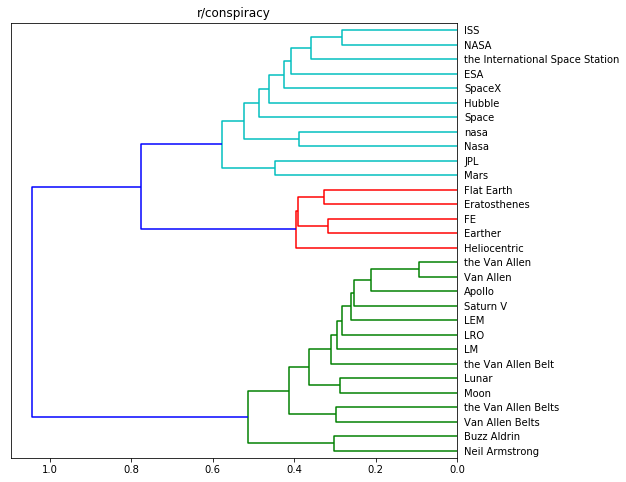

In [48]:
D=pairwise_distances(ttm3,metric='cosine')
link=linkage(squareform(D),'ward')

plt.rcParams['figure.figsize']='8,8'

dendrogram(link,labels=targets,orientation='left')
#plt.axvline(x=0.75,ls='--')
#based on eyeballing decided the 75% to draw the line
#anyhting below line is clusters , above the line is not cluters
plt.title('r/conspiracy')
plt.show()

In [49]:
targets=get_neighbors('HAARP', k=30)
ttm4=ttm[[V.vocabulary_[n] for n in targets]]

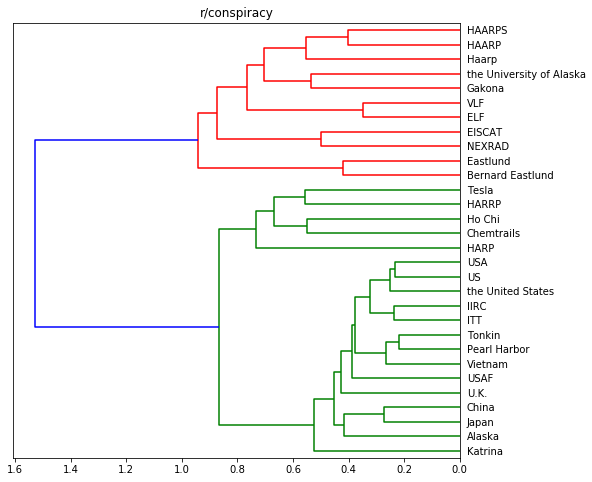

In [50]:
D=pairwise_distances(ttm4,metric='cosine')
link=linkage(squareform(D),'ward')

plt.rcParams['figure.figsize']='8,8'

dendrogram(link,labels=targets,orientation='left')
#plt.axvline(x=0.75,ls='--')
#based on eyeballing decided the 75% to draw the line
#anyhting below line is clusters , above the line is not cluters
plt.title('r/conspiracy')
plt.show()

In [51]:
targets=get_neighbors('UFO', k=30)
ttm5=ttm[[V.vocabulary_[n] for n in targets]]

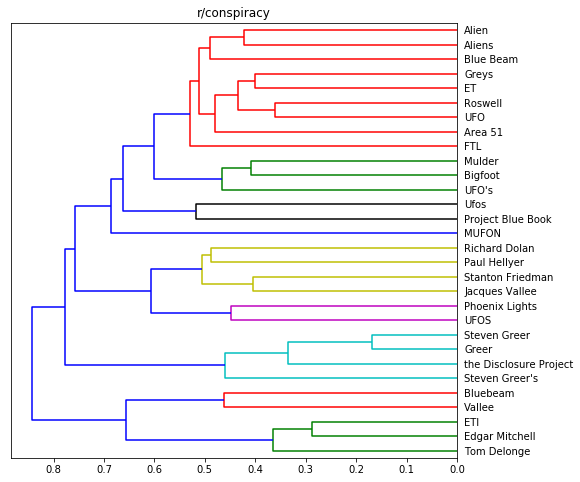

In [52]:
D=pairwise_distances(ttm5,metric='cosine')
link=linkage(squareform(D),'ward')

plt.rcParams['figure.figsize']='8,8'

dendrogram(link,labels=targets,orientation='left')
#plt.axvline(x=0.75,ls='--')
#based on eyeballing decided the 75% to draw the line
#anyhting below line is clusters , above the line is not cluters
plt.title('r/conspiracy')
plt.show()